In [1]:
import numpy as np
import torch
from tqdm import tqdm
from torch.utils.data import DataLoader
import torch.nn as nn
from collections import defaultdict
import math
import scripts.utils as utils
import config as cfg
from data_loader import *
from model import *
import copy
from numpy.linalg import norm


In [2]:
vocab_dict = utils.get_word2ix(cfg.vocab_path)
model = CBoW2(vocab_size=len(vocab_dict), embedding_dim=cfg.edim)
model.to(cfg.DEVICE)
model.load_state_dict(torch.load(os.path.join("checkpoints", "par_lr_0_001", "save", "model_val.torch")))

<All keys matched successfully>

In [3]:
def cosine_sim(v1, v2):
    return np.dot(v1,v2)/(norm(v1)*norm(v2))


def get_cosine_sim(l1, l2, vocab_dict, device):
    t1 = torch.tensor(vocab_dict[l1]).unsqueeze(0).long().to(device)
    t2 = torch.tensor(vocab_dict[l2]).unsqueeze(0).long().to(device)
    e1 = model.get_embeddings(t1).squeeze().detach().cpu().numpy()
    e2 = model.get_embeddings(t2).squeeze().detach().cpu().numpy()
    return cosine_sim(e1, e2)
    

In [4]:
cat_tiger = get_cosine_sim("cat", "tiger", vocab_dict, cfg.DEVICE)
print("cat_tiger =", cat_tiger)
plane_human = get_cosine_sim("plane", "human", vocab_dict, cfg.DEVICE)
print("plane_human =", plane_human)

cat_tiger = 0.9065176
plane_human = 0.86195904


In [5]:
my_mine = get_cosine_sim("my", "mine", vocab_dict, cfg.DEVICE)
print("my_mine =", my_mine)
happy_human = get_cosine_sim("happy", "human", vocab_dict, cfg.DEVICE)
print("happy_human =", happy_human)

my_mine = 0.9056487
happy_human = 0.9235775


In [6]:
happy_cat = get_cosine_sim("happy", "cat", vocab_dict, cfg.DEVICE)
print("happy_cat =", happy_cat)
king_princess = get_cosine_sim("king", "princess", vocab_dict, cfg.DEVICE)
print("king_princess =", king_princess)

happy_cat = 0.8628401
king_princess = 0.86253476


In [7]:
ball_racket = get_cosine_sim("ball", "racket", vocab_dict, cfg.DEVICE)
print("ball_racket =", ball_racket)
good_ugly = get_cosine_sim("good", "ugly", vocab_dict, cfg.DEVICE)
print("good_ugly =", good_ugly)

ball_racket = 0.88345003
good_ugly = 0.8391444


In [8]:
cat_racket = get_cosine_sim("cat", "racket", vocab_dict, cfg.DEVICE)
print("cat_racket =", cat_racket)
good_bad = get_cosine_sim("good", "bad", vocab_dict, cfg.DEVICE)
print("good_bad =", good_bad)

cat_racket = 0.92847943
good_bad = 0.9054469


In [9]:
from scipy.spatial.distance import cosine, cdist

def get_nearest(wa, wb, wc, vocab_dict, device):
    ta = torch.tensor(vocab_dict[wa]).unsqueeze(0).long().to(device)
    tb = torch.tensor(vocab_dict[wb]).unsqueeze(0).long().to(device)
    tc = torch.tensor(vocab_dict[wc]).unsqueeze(0).long().to(device)
    ea = model.get_embeddings(ta).squeeze().detach().cpu().numpy()
    eb = model.get_embeddings(tb).squeeze().detach().cpu().numpy()
    ec = model.get_embeddings(tc).squeeze().detach().cpu().numpy()
    pred_ed = eb-ea+ec
    sim_dict = {}
    for key, value in vocab_dict.items():
        if key == wa or key == wb or key == wc:
            continue
        td = torch.tensor(value).unsqueeze(0).long().to(device)
        ed = model.get_embeddings(td).squeeze().detach().cpu().numpy()
        sim_dict[key] = cosine_sim(pred_ed, ed)
    sim_dict_ = dict(sorted(sim_dict.items(), key=lambda item: item[1]))
    return (list(sim_dict_.keys())[-5:])[::-1]

In [10]:
n = get_nearest("king", "queen", "man", vocab_dict, cfg.DEVICE)
print(f"king:queen, man:{n}")
n = get_nearest("king", "queen", "prince", vocab_dict, cfg.DEVICE)
print(f"king:queen, prince:{n}")
n = get_nearest("king", "man", "queen", vocab_dict, cfg.DEVICE)
print(f"king:man, queen:{n}")
n = get_nearest("woman", "man", "princess", vocab_dict, cfg.DEVICE)
print(f"woman:man, princess:{n}")
n = get_nearest("prince", "princess", "man", vocab_dict, cfg.DEVICE)
print(f"prince:princess, man:{n}")

king:queen, man:['friend', 'deep', 'person', 'beauty', 'always']
king:queen, prince:['irène', 'äfven', 'tid', 'cœurs', 'bride']
king:man, queen:['friend', 'deep', 'person', 'beauty', 'always']
woman:man, princess:['prince', 'tout', 'discovery', 'author', 'shogun']
prince:princess, man:['girl', 'woman', 'gentleman', 'person', 'fellow']


In [11]:
she_her = get_cosine_sim("she", "her", vocab_dict, cfg.DEVICE)
print("she_her =", cat_tiger)
he_chair = get_cosine_sim("he", "chair", vocab_dict, cfg.DEVICE)
print("he_chair =", he_chair)

she_her = 0.9065176
he_chair = 0.8290193


In [12]:
europe_france = get_cosine_sim("europe", "france", vocab_dict, cfg.DEVICE)
print("europe_france =", europe_france)
fish_read = get_cosine_sim("fish", "read", vocab_dict, cfg.DEVICE)
print("fish_read =", fish_read)

europe_france = 0.9272915
fish_read = 0.8765209


In [13]:
england_british = get_cosine_sim("england", "british", vocab_dict, cfg.DEVICE)
print("england_british =", england_british)
cow_philosophy = get_cosine_sim("cow", "philosophy", vocab_dict, cfg.DEVICE)
print("cow_philosophy =", cow_philosophy)

england_british = 0.90075195
cow_philosophy = 0.8600543


In [14]:
n = get_nearest("england", "english", "france", vocab_dict, cfg.DEVICE)
print(f"england:english, france:{n}")
n = get_nearest("london", "city", "england", vocab_dict, cfg.DEVICE)
print(f"london:city, england:{n}")
n = get_nearest("she", "her", "he", vocab_dict, cfg.DEVICE)
print(f"she:her, he:{n}")

england:english, france:['french', 'themselves', 'popular', 'altogether', 'nevertheless']
london:city, england:['country', 'state', 'land', 'night', 'law']
she:her, he:['his', 'him', 'the', 'them', 'and']


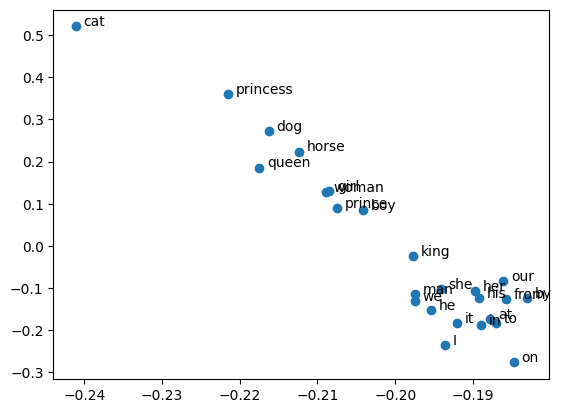

In [15]:
words = ["horse", "cat", "dog", "I", "he", "she", "it", "her", "his", "our", "we", "in", "on", \
    "from", "to", "at", "by", "man", "woman", "boy", "girl", "king", "queen", "prince", "princess"]

embeddings_list = []

for word in words:
    t = torch.tensor(vocab_dict[word.lower()]).unsqueeze(0).long().to(cfg.DEVICE)
    e = model.get_embeddings(t).squeeze().detach().cpu().numpy()
    embeddings_list.append(e)

embeddings = np.array(embeddings_list).T

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(embeddings)
projections = pca.components_.T

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(projections[:,0], projections[:,1])
for i, txt in enumerate(words):
    ax.annotate(txt, (projections[i,0]+1e-3, projections[i,1]+1e-3))
plt.show()
